In [41]:
import cv2
import glob
import tqdm
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [32]:
PATH="/Users/shujakhalid/Downloads/refinerf_extrinsics_phd_checkpoint"

In [33]:
files = glob.glob(PATH+"/*/*tfevents*")

In [34]:
files

['/Users/shujakhalid/Downloads/refinerf_extrinsics_phd_checkpoint/Skating_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_0_extrinsics_1_noise_pct_0.10/events.out.tfevents.1673904286.skhalid-MS-7A94',
 '/Users/shujakhalid/Downloads/refinerf_extrinsics_phd_checkpoint/Umbrella_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_0_extrinsics_1_noise_pct_0.30/events.out.tfevents.1673736310.skhalid-MS-7A94',
 '/Users/shujakhalid/Downloads/refinerf_extrinsics_phd_checkpoint/Skating_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_0_extrinsics_1_noise_pct_0.20/events.out.tfevents.1673895954.skhalid-MS-7A94',
 '/Users/shujakhalid/Downloads/refinerf_extrinsics_phd_checkpoint/Balloon1_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_0_extrinsics_1_noise_pct_0.0/events.out.tfevents.1673841184.skhalid-MS-7A94',
 '/Users/shujakhalid/Downloads/refinerf_extrins

In [74]:
data = {}
files.sort()
for file in files:
    print("processing file: {}".format(file))
    data[file] = {
        "step": [],
        "psnr/psnr_s": [],
        "psnr/psnr_d": [],
        "loss/img_s_loss": [],
        "loss/img_d_loss": [],
        "validation/loss": [],
        "validation/lr": [],
        "evaluate/PSNR": [],
        "evaluate/SSIM": [],
        "evaluate/LPIPS": [],
    }
    for i, event in enumerate(tf.train.summary_iterator(file)):
        data[file]["step"].append(i)
        for value in event.summary.value:
            data[file][value.tag].append(value.simple_value)
#     break;

processing file: /Users/shujakhalid/Downloads/refinerf_extrinsics_phd_checkpoint/Balloon1_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_0_extrinsics_1_noise_pct_0.0/events.out.tfevents.1673841184.skhalid-MS-7A94
processing file: /Users/shujakhalid/Downloads/refinerf_extrinsics_phd_checkpoint/Balloon1_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_0_extrinsics_1_noise_pct_0.10/events.out.tfevents.1673830814.skhalid-MS-7A94
processing file: /Users/shujakhalid/Downloads/refinerf_extrinsics_phd_checkpoint/Balloon1_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_0_extrinsics_1_noise_pct_0.20/events.out.tfevents.1673821085.skhalid-MS-7A94
processing file: /Users/shujakhalid/Downloads/refinerf_extrinsics_phd_checkpoint/Balloon1_encoder_deform_3_time_dim_0_deform_qty_3_deform_hidden_qty_64_iters_50000_intrinsics_0_extrinsics_1_noise_pct_0.30/events.out.tfevents.1673811959.skhalid-M


fl: noise x0.0 evaluate/PSNR Playground 22.7968692779541
fl: noise x0.0 evaluate/SSIM Playground 0.87945955991745
fl: noise x0.0 evaluate/LPIPS Playground 0.08157233893871307
fl: noise x0.30 evaluate/PSNR Playground 22.587936401367188
fl: noise x0.30 evaluate/SSIM Playground 0.8716546297073364
fl: noise x0.30 evaluate/LPIPS Playground 0.08563919365406036

fl: noise x0.0 evaluate/PSNR Umbrella 19.241867065429688
fl: noise x0.0 evaluate/SSIM Umbrella 0.5890821814537048
fl: noise x0.0 evaluate/LPIPS Umbrella 0.16923238337039948
fl: noise x0.30 evaluate/PSNR Umbrella 19.277204513549805
fl: noise x0.30 evaluate/SSIM Umbrella 0.5863864421844482
fl: noise x0.30 evaluate/LPIPS Umbrella 0.17365579307079315

fl: noise x0.0 evaluate/PSNR Balloon1 16.172889709472656
fl: noise x0.0 evaluate/SSIM Balloon1 0.6044908165931702
fl: noise x0.0 evaluate/LPIPS Balloon1 0.18078535795211792
fl: noise x0.30 evaluate/PSNR Balloon1 16.291399002075195
fl: noise x0.30 evaluate/SSIM Balloon1 0.5982757806777954
fl

/opt/anaconda3/envs/venv-torch/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()



fl: noise x0.30 evaluate/PSNR Skating 22.899211883544922
fl: noise x0.30 evaluate/SSIM Skating 0.805465817451477
fl: noise x0.30 evaluate/LPIPS Skating 0.06661416590213776

fl: noise x0.30 evaluate/PSNR Jumping 8.174288749694824
fl: noise x0.30 evaluate/SSIM Jumping 0.6104263067245483
fl: noise x0.30 evaluate/LPIPS Jumping 0.20743654668331146


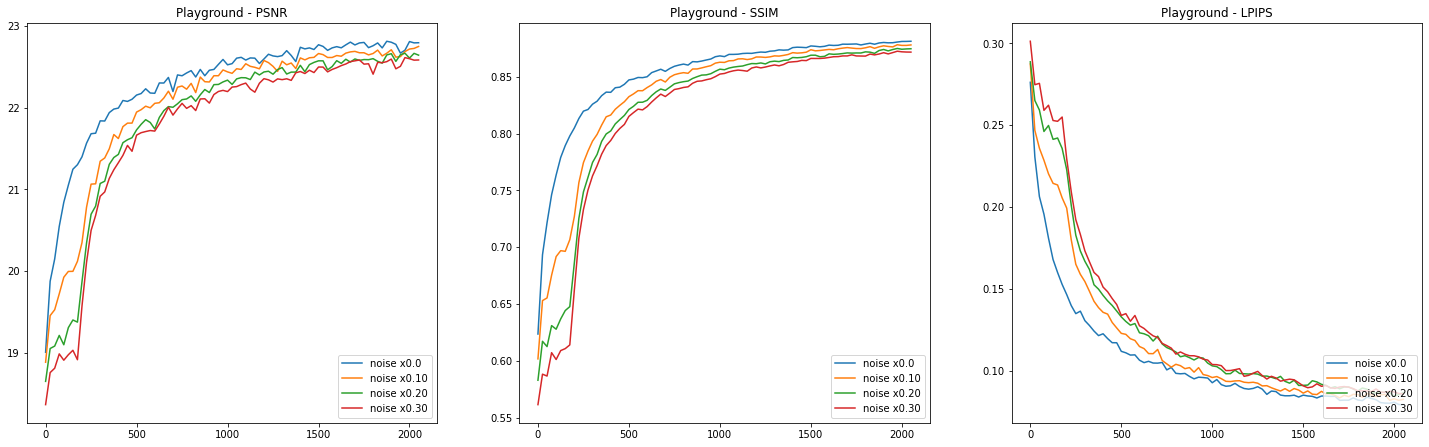

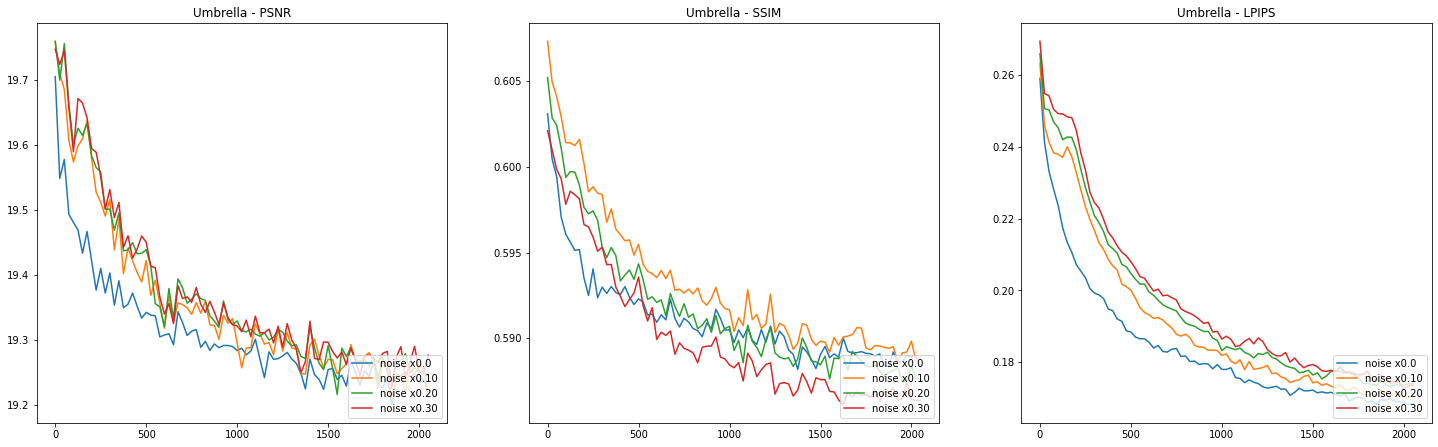

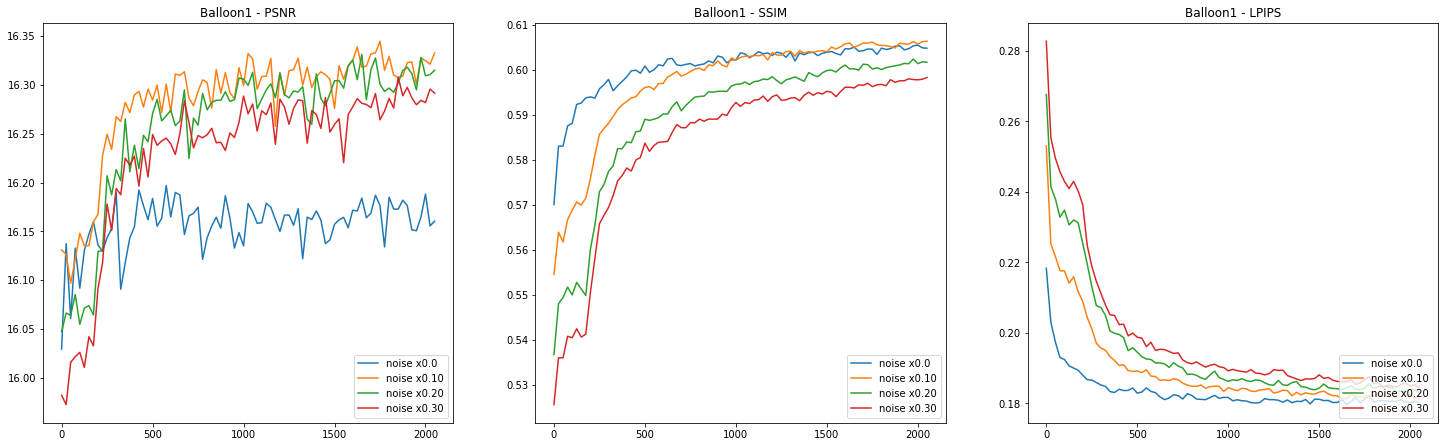

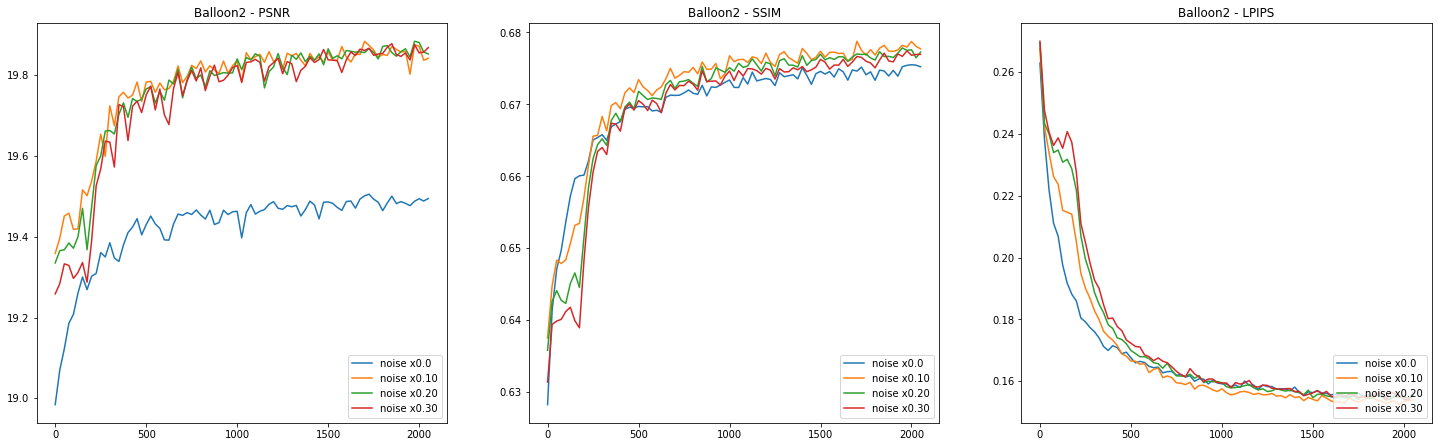

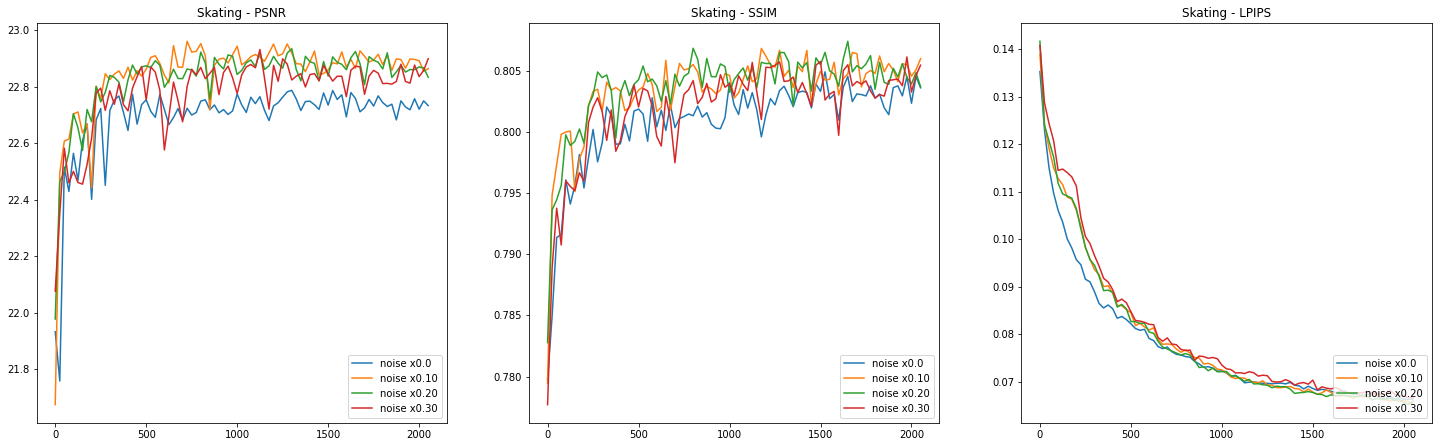

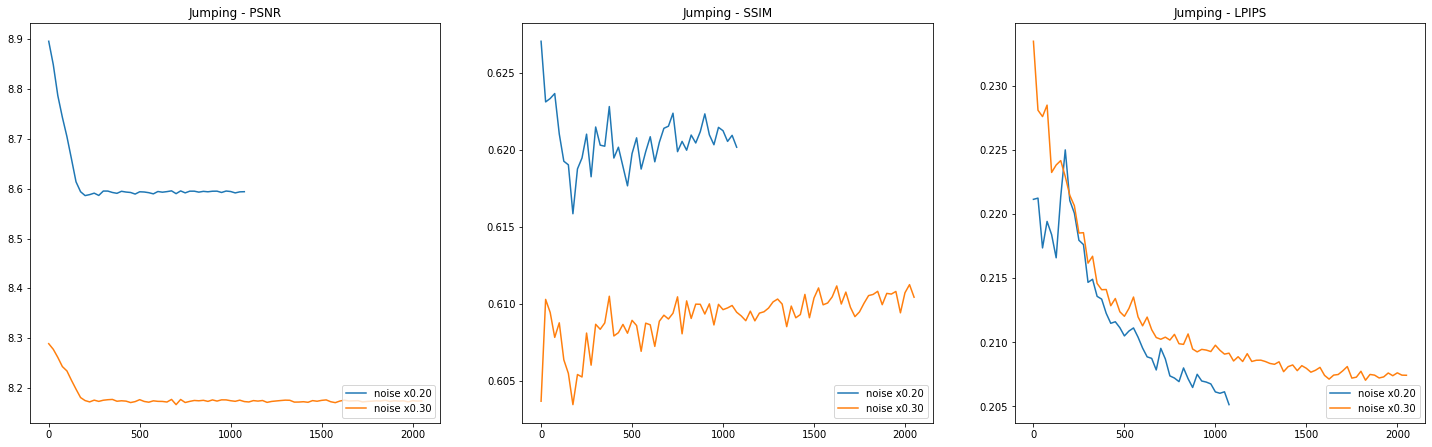

In [114]:
scenes = ["Playground", "Umbrella", "Balloon1", "Balloon2", "Skating", "Jumping"]
keys = ["evaluate/PSNR", "evaluate/SSIM", "evaluate/LPIPS"]

# Separate different files according to scene
for scene in scenes:
    print()
    cond = [v for v in files if scene in v]
    plt.figure(figsize=(25,25))
    for file in cond:
        for i,key in enumerate(keys):
            plt.subplot(int("33"+str(i+1)))
            label = file.split("_noise_")[1].split("/")[0].replace("pct_", "noise x")
            x_axis = [v*25 for v in range(len(data[file][key]))]
            y_axis = data[file][key]
            plt.title(scene + " - " + key.split("/")[-1])
            plt.plot(x_axis, y_axis, "-", label=label)
            plt.legend(loc="lower right")
            
            # stats
            if ("_0.0" in file):
                msg = "fl: "+ str(label) + " " + key + " " + scene + " " + str(y_axis[-10]) # It takes slightly longer for the model to train - account for this and choose an earlier value
                print(msg)
            if ("_0.3" in file):
                msg = "fl: "+ str(label) + " " + key + " " + scene + " " + str(y_axis[-1])
                print(msg)
#             if ("_0.0" in msg or "_0.3" in msg):
#                 print(msg)


In [ ]:
# y_axis[-10]

In [ ]:
# y_axis[-10]